<h1><strong>Title: Tech Stocks Risk and Returns Analysis for 2018 - 2025</strong></h1>

In [1]:
# Import Libraries for Data and Mathematics
import pandas as pd
import numpy as np

# Import plots
import matplotlib.pyplot as plt
import seaborn as sns

# For FInance Analysis
import yfinance as yf

# For Optimization
from scipy.optimize import minimize
import platform

# Check Version
print('Python: ',platform.python_version())
print('Pandas: ',pd.__version__)

Python:  3.12.3
Pandas:  2.3.2


<H2>1. Selecting Stocks & Collect Data</H2>

 - The goal here is to define the tickers and analyze the window, and then fench the adjusted prices from Yahoo Finance.
 - The reason of this is because the prices are the foundations for all later calculations like returns, risks, correlations, portfolio, and optimizations.


In [2]:
ticker = ['AAPL', 'MSFT', 'TSLA', 'AMZN', 'NFLX']
start_date = '2018-01-01'
end_date = '2025-08-01'

stocks_data = yf.download(
    tickers = ticker,
    start = start_date,
    end = end_date,
    auto_adjust = True,
    progress = False
)

pd.set_option('display.max_rows', None)      # None = show all rows
pd.set_option('display.max_columns', None)   # None = show all columns
pd.set_option('display.width', None)         # Auto width
pd.set_option('display.max_colwidth', None)

stocks_data

Price            Close                                                   \
Ticker            AAPL        AMZN        MSFT         NFLX        TSLA   
Date                                                                      
2018-01-02   40.381004   59.450500   79.198334   201.070007   21.368668   
2018-01-03   40.373962   60.209999   79.566895   205.050003   21.150000   
2018-01-04   40.561489   60.479500   80.267220   205.630005   20.974667   
2018-01-05   41.023308   61.457001   81.262360   209.990005   21.105333   
2018-01-08   40.870934   62.343498   81.345322   212.050003   22.427334   
2018-01-09   40.866245   62.634998   81.290054   209.309998   22.246000   
2018-01-10   40.856873   62.716499   80.921432   212.520004   22.320000   
2018-01-11   41.088943   63.834000   81.161026   217.240005   22.530001   
2018-01-12   41.513237   65.260002   82.561615   221.229996   22.414667   
2018-01-16   41.302261   65.242996   81.409790   221.529999   22.670668   
2018-01-17   41.984421   64.750000   83.059181   217.500000   23.143999   
2018-01-18   42.021915   64.666000   83.022316   220.330002   22.971333   
2018-01-19   41.834389   64.728996   82.930176   220.460007   23.334667   
2018-01-22   41.492146   66.365501   84.413719   227.580002   23.437332   
2018-01-23   41.501518   68.126999   84.680946   250.289993   23.519333   
2018-01-24   40.840454   67.875504   84.607224   261.299988   23.059334   
2018-01-25   40.111427   68.897499   85.077141   269.700012   22.509333   
2018-01-26   40.205177   70.102501   86.671257   274.600006   22.856667   
2018-01-29   39.373001   70.884003   86.542244   284.589996   23.302000   
2018-01-30   39.140923   71.890999   85.454948   278.799988   23.054667   
2018-01-31   39.248756   72.544502   87.546623   270.299988   23.620667   
2018-02-01   39.330795   69.500000   86.855553   265.070007   23.283333   
2018-02-02   37.624233   71.497498   84.570381   267.429993   22.916668   
2018-02-05   36.684219   69.500000   81.087288   254.259995   22.208668   
2018-02-06   38.217316   72.141998   84.155746   265.720001   22.264668   
2018-02-07   37.399185   70.838997   82.570839   264.559998   23.000000   
2018-02-08   36.370090   67.525002   78.332176   250.100006   21.015333   
2018-02-09   36.814941   66.980003   81.253174   249.470001   20.694668   
2018-02-12   38.297802   69.311501   82.128532   257.950012   21.048668   
2018-02-13   38.681473   70.725502   82.773560   258.269989   21.577333   
2018-02-14   39.394657   72.552498   84.069626   266.000000   21.487333   
2018-02-15   40.717464   73.087997   85.782310   280.269989   22.271334   
2018-02-16   40.585651   72.434502   85.171318   278.519989   22.365999   
2018-02-20   40.449142   73.417503   85.837860   278.549988   22.318001   
2018-02-21   40.265545   74.146004   84.699165   281.040009   22.219999   
2018-02-22   40.602116   74.266998   84.921349   278.140015   23.077999   
2018-02-23   41.308247   75.000000   87.078400   285.929993   23.469999   
2018-02-26   42.124996   76.097504   88.337448   294.160004   23.827999   
2018-02-27   41.988480   75.598999   87.208008   290.609985   23.399332   
2018-02-28   41.924931   75.622498   86.809914   291.380005   22.870667   
2018-03-01   41.190563   74.672501   85.958221   290.390015   22.062000   
2018-03-02   41.475376   75.012497   86.143372   301.049988   22.341333   
2018-03-05   41.618938   76.180496   86.689568   315.000000   22.223333   
2018-03-06   41.583637   76.882004   86.393341   325.220001   21.879999   
2018-03-07   41.197620   77.250000   86.893250   321.160004   22.153334   
2018-03-08   41.647190   77.593002   87.420944   317.000000   21.940001   
2018-03-09   42.362724   78.944504   89.374329   331.440002   21.811333   
2018-03-12   42.772278   79.919502   89.587250   321.299988   23.034000   
2018-03-13   42.360378   79.408997   87.402428   315.880005   22.789333   
2018-03-14   42.000252   79.550003   86.883980   321.549988   21.775333   
2018-03-15   42.049671   

<p>Interpretation:</p>

 - Rows = trading days from 2018 to 2025
 - Columns = about OHLCV which is Open, High, Low, Close, Volume, for each ticker which is Multi Index
 - Using "auto_adjust = True", to make the "Close" column already reflects adjusted prices. So use it for returns. 

<h2>2. Data Quality Checks and Cleaning</h2>

 - The goal here to is to verify the downloaded data and is it ready for the return calculations.
 - When a missing values or wrong index types can break the return computations and it distort portfolion metrics.

<p>Steps:</p>

    1. Find the Missing values per column
    2. The index type should be "DatetimeIndex"
    3. First rows of the "Close" prices should be already adjusted

In [3]:
# Data Quality Checks

print('Missing values per column:')
print(stocks_data.isna().sum())

print('\nIndex Information:')
print(stocks_data.index)

print('\nFirst rows of Close prices:')
stocks_data["Close"].head()

Missing values per column:
Price   Ticker
Close   AAPL      0
        AMZN      0
        MSFT      0
        NFLX      0
        TSLA      0
High    AAPL      0
        AMZN      0
        MSFT      0
        NFLX      0
        TSLA      0
Low     AAPL      0
        AMZN      0
        MSFT      0
        NFLX      0
        TSLA      0
Open    AAPL      0
        AMZN      0
        MSFT      0
        NFLX      0
        TSLA      0
Volume  AAPL      0
        AMZN      0
        MSFT      0
        NFLX      0
        TSLA      0
dtype: int64

Index Information:
DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
               '2018-01-12', '2018-01-16',
               ...
               '2025-07-18', '2025-07-21', '2025-07-22', '2025-07-23',
               '2025-07-24', '2025-07-25', '2025-07-28', '2025-07-29',
               '2025-07-30', '2025-07-31'],
              dtype='datetime64[ns]

Ticker,AAPL,AMZN,MSFT,NFLX,TSLA
Date,,,,,
2018-01-02,40.381004,59.450500,79.198334,201.070007,21.368668
2018-01-03,40.373962,60.209999,79.566895,205.050003,21.150000
2018-01-04,40.561489,60.479500,80.267220,205.630005,20.974667
2018-01-05,41.023308,61.457001,81.262360,209.990005,21.105333
2018-01-08,40.870934,62.343498,81.345322,212.050003,22.427334


**Interpretation**:

 - So in the data for "Missing values per column" they are all "0", the dataset are clean.
 - In Index the "DatetimeIndex" is a correct for time series.
 - The "Close" panel includes for all five tickers. This is the basis for the return calculations in the next step.

<h2><strong>3. Daily Returns</strong></h2>

 - The goal here is to convert the adjusted prices into the daily returns
 - The daily return represents the percent change in price from the previous trading day to the current trading day

<p>Formula:</p>
    $$
    R_t = \frac{P_t - P_{t-1}}{P_{t-1}}
    $$
<p>Where:</p>
<ul>
  <li><b>R<sub>t</sub></b> = Daily return at time. <i>t</i></li>
  <li><b>P<sub>t</sub></b> = Price at time <i>t</i> (current day).</li>
  <li><b>P<sub>t-1</sub></b> = Price at time <i>t-1</i> (previous day).</li>
</ul>

 - So first row will naturally be "NaN" because there is no previous day to compare.

In [4]:
import warnings

warnings.filterwarnings('ignore')

# To compute the daily returns from the adjusted closing prices
# The pct_change() calculates the percent change between the current row and the previous row
returns = stocks_data['Close'].pct_change()
returns.head(10).round(4)

Ticker,AAPL,AMZN,MSFT,NFLX,TSLA
Date,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN
2018-01-03,-0.0002,0.0128,0.0047,0.0198,-0.0102
2018-01-04,0.0046,0.0045,0.0088,0.0028,-0.0083
2018-01-05,0.0114,0.0162,0.0124,0.0212,0.0062
2018-01-08,-0.0037,0.0144,0.0010,0.0098,0.0626
2018-01-09,-0.0001,0.0047,-0.0007,-0.0129,-0.0081
2018-01-10,-0.0002,0.0013,-0.0045,0.0153,0.0033
2018-01-11,0.0057,0.0178,0.0030,0.0222,0.0094
2018-01-12,0.0103,0.0223,0.0173,0.0184,-0.0051


**Observation**:

 - The very first row contains NaN values since there is no previous trading day to compute returns from.  
 - All other rows show valid daily returns. For example, a value of 0.0103 corresponds to a +1.03% daily return, while a value of -0.0102 corresponds to a -1.02% daily return.
 - To proceed analysis, we need to remove the NaN row.

In [5]:
# For this part we will clean returns and we will Drop NaN and infinities)

returns = stocks_data['Close'].pct_change()
returns = returns.dropna()
returns.head(10).round(4)

Ticker,AAPL,AMZN,MSFT,NFLX,TSLA
Date,,,,,
2018-01-03,-0.0002,0.0128,0.0047,0.0198,-0.0102
2018-01-04,0.0046,0.0045,0.0088,0.0028,-0.0083
2018-01-05,0.0114,0.0162,0.0124,0.0212,0.0062
2018-01-08,-0.0037,0.0144,0.0010,0.0098,0.0626
2018-01-09,-0.0001,0.0047,-0.0007,-0.0129,-0.0081
2018-01-10,-0.0002,0.0013,-0.0045,0.0153,0.0033
2018-01-11,0.0057,0.0178,0.0030,0.0222,0.0094
2018-01-12,0.0103,0.0223,0.0173,0.0184,-0.0051
2018-01-16,-0.0051,-0.0003,-0.0140,0.0014,0.0114


**Check**:

 - For the first row the NaN is dropped.
 - The "returns" DataFrame is now clean and it is now ready for Statistical Summary, Correlations, and Portfolio Analysis.

<h1>4. Summary Statistics & Annualization</h1>

 - The Statistics describe the behavior of each stock and in terms of risk and return.
 - By comparing average returns and volatilities helps us to understand which stocks are high-growth/high-risk vs. stable/low-risk
 - The method we will use is to compute the mean and standard deviation of Daily Returns and to scale them to annual values using 252 trading days. 

In [6]:

# For Statistical Summary and this computes the average of daily return of the stock.
mean_daily = returns.mean()
# For Annual Values and this computes the standard deviation(volatility) of the daily returns 
std_daily = returns.std()


# Annualized statistics
mean_annual = mean_daily * 252            # ~252 trading days per year
std_annual  = std_daily * (252 ** 0.5)    # volatility scales with sqrt of time

summary = pd.DataFrame({
    'Mean_Daily': mean_daily.round(4),
    'Volatile_Daily': std_daily.round(4),
    'Mean_Annual': mean_annual.round(4),
    'Volatile_Annual': std_annual.round(4)
})

summary

,Mean_Daily,Volatile_Daily,Mean_Annual,Volatile_Annual
Ticker,,,,
AAPL,0.0011,0.0196,0.2652,0.3118
AMZN,0.0010,0.0217,0.2410,0.3451
MSFT,0.0012,0.0182,0.2939,0.2882
NFLX,0.0013,0.0275,0.3297,0.4365
TSLA,0.0022,0.0407,0.5607,0.6455


**Interpretation**:

 - For the "Mean_Annual:" this shows an expected annualized return if the past patterns continue.
 - For the "Volatile_Annual:" this is an annualized volatility or "Risk"; the higher the values means it is more uncertainty.

**Interpretation of Results**:

 - The "MSFT" or "Microsoft", shows the best risk/return trade-off; this means the highest annual return ~29% with the lowest annualize volatility 28%
 - "AAPL" or "Apple inc", and "AMZN" or "Amazon", delivers a stable growth with moderate risk, suitable for a balanced portfolios.
 - "NFLX" or "NETFLIX", provides a higher potential returns which is ~33% but with higher volatility ~43%
 - "Tesla" or "TSLA", has a stand out as the high-risk/high-returns which expects ~56% annualized return but it has a ~64% volatility.

<p>This analysis is a highlight of the spectrum: "MSFT" as a "defensive drowth" stock, TSLA as an "aggressive growth" stock. With the "AAPL", "AMZN" and "NFLX" are learning riskier.</p>

<h1>5. Sharpe Ratio</h1>

<p><strong>What is Sharpe Ratio</strong></p>
   
    - The Sharpe Ratio measures risk-adjusted return: how much excess return (above the risk-free rate) an asset delivers for each unit of risk (volatility) it carries.

<p><strong>Formula:</strong></p>

$$
S = \frac{R - R_f}{\sigma}
$$

    - (R) = is the expected return (Daily or Annualized).
    - (R_f) = risk-free rate (here assumed 2% annually i.e U.S Treasury yield).
    - (\sigma) = volatility (standard deviation of returns).

<p>
    Why do we care?
</p>

    - A stock with a high return might also have high volatility or risk (e.g., Tesla).
    - The Sharpe Ratio tells us which stocks are truly efficient, delivering more return per unit of risk.

<p>
    Rule of Thumb:
</p>

    Sharpe < 0.5 → weak
    Sharpe ≈ 1 → acceptable/good
    Sharpe > 1.5 → strong
    Sharpe > 2 → excellent

<p>
    We will compute the both daily Sharpe and Annual Shape to compare accross stocks.
</p>

In [7]:
rf_annual = 0.02 # Risk-free rate
rf_daily = rf_annual / 252

summary['Sharp_Daily'] = (summary['Mean_Daily'] - rf_daily) / summary['Volatile_Daily']
summary['Sharp_Annually'] = (summary['Mean_Annual'] - rf_annual) / summary['Volatile_Annual']

summary.round(4)

,Mean_Daily,Volatile_Daily,Mean_Annual,Volatile_Annual,Sharp_Daily,Sharp_Annually
Ticker,,,,,,
AAPL,0.0011,0.0196,0.2652,0.3118,0.0521,0.7864
AMZN,0.0010,0.0217,0.2410,0.3451,0.0424,0.6404
MSFT,0.0012,0.0182,0.2939,0.2882,0.0616,0.9504
NFLX,0.0013,0.0275,0.3297,0.4365,0.0444,0.7095
TSLA,0.0022,0.0407,0.5607,0.6455,0.0521,0.8376


<p>
    <strong>Sharpe Ratio Interpretation:</strong>
</p>

 - MSFT: The best performer with the highest Sharpe with ~0.95. It has a strong risk-adjusted efficiency.
 - AAPL: Has a solid performance with ~0.79, a stable option with a good balance of return and risk.
 - TSLA: The sharpe is ~0.84 which shows efficiency close to Apple, but with much greater uncertainty. Has a very high return but it is equally to a high volatility.
 - NFLX: Higher return with ~33% but the volitility drags the sharpe down by ~0.71.
 - AMZN: Has a lowest Sharpe with ~0.64, meaning it has a weaker return relative to a risk compared to peers.

Overall: MSFT has the best risk-adjusted return, while "TSLA" remains an attractive for aggressive investors. AAPL is balanced, NFLX and AMZN is the least efficient.

<h1><Strong>6. Correlation and Coviariance</strong></h1>

<p><strong>What is correlation?</strong></p>

 - Correlation is the measures for the directional similarity between the two stocks.
 - Values from range -1 to +1:
    * +1 = moves perfectly together (no diversification benefit).
    * 0 = independent movements (good diversification).
    * -1 = move in opposite directions (perfect hedge, rare in practice).
 - For porfolio construction, the lower correlations between assets are better because they reduce overall portfolio risk.

<p><strong>What is Covariance</strong></p>
 
 - Covariance is the measure for "absolute co-movement" of two assets in terms of returns.
 - Unlike correlation, it is not scaled, so the magnitude is depends in volatility.
 - We compute daily covariance of returns and then annualize it by multiplying by 252 (trading days in a year).


<p><strong>Why do we care?</strong></p>
 
 - Correlation helps us visually understand relationships (e.g., Apple & Microsoft usually move together).
The covariance matrix is a required input for calculating portfolio risk.
 - Together, they show us how combining stocks might lower risk without sacrificing return.

In [8]:
correlational_matrix = returns.corr() # This is the correlational matrix(Daily Returns)

covariance_annual = returns.cov() * 252 # This is the annualize covariance matrix

print('Correlation Matrix:\n', correlational_matrix.round(3))
print()
print('\nAnnualized Covariance Matrix:\n', covariance_annual.round(4))

Correlation Matrix:
 Ticker   AAPL   AMZN   MSFT   NFLX   TSLA
Ticker                                   
AAPL    1.000  0.606  0.714  0.453  0.463
AMZN    0.606  1.000  0.697  0.561  0.427
MSFT    0.714  0.697  1.000  0.511  0.434
NFLX    0.453  0.561  0.511  1.000  0.353
TSLA    0.463  0.427  0.434  0.353  1.000


Annualized Covariance Matrix:
 Ticker    AAPL    AMZN    MSFT    NFLX    TSLA
Ticker                                        
AAPL    0.0972  0.0652  0.0642  0.0617  0.0932
AMZN    0.0652  0.1191  0.0693  0.0845  0.0950
MSFT    0.0642  0.0693  0.0831  0.0643  0.0807
NFLX    0.0617  0.0845  0.0643  0.1905  0.0994
TSLA    0.0932  0.0950  0.0807  0.0994  0.4167


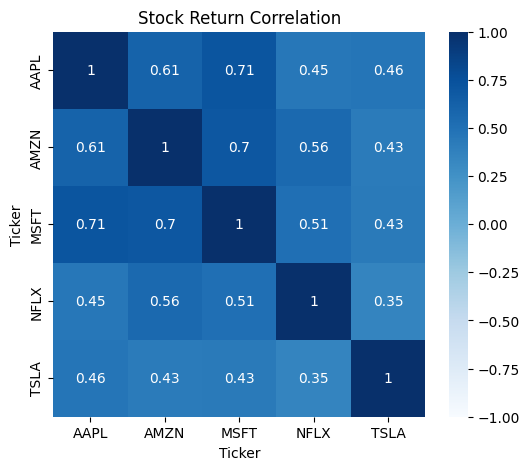

In [9]:
plt.figure(figsize = (6,5))
sns.heatmap(correlational_matrix, annot = True, cmap = 'Blues', vmin = -1, vmax = 1)
plt.title('Stock Return Correlation')
plt.show()

<p><strong>
    Interpretation and Correlation Heatmap:
</strong></p>

    - AAPL & MSFT(0.71: Has a very strong positive correlations. They often move together, so by combining them adds a little diversification.
    - AAPL & AMZN(0.61), AMZN & MSFT (0.70): also this has a strong correlated. These large tech stocks share market drivers.
    - NFLX(~0.45 - 0.56): Correlations are moderate, this moves partly with big tech, but also it has some independent behavior.
    - TSLA((~0.35 - 0.46): Has the lowest correlations with others. This means the Tesla's stocks adds the most diversification benefits in this group.

 - Overall: The portfolio has a strong co-movement among big tech(AAPL, MSFT, AMZN), while the TSLA and some extent NFLX are provided diversification opportunities. This matters because diversification reduces the overall portfolio volatility.

<h1><strong>7. Cumulative Return</strong></h1>

<p>
    We may looked at the daily and annualized return in a stastistical way for example, if I invested $1 in 2018 what would it be worth today?
</p>
<p>
    This is where cumulative comes in.
</p>

<p>
    <strong>What are the Cumulative Return?</strong>
</p>

 - The Cumulative Returns are the track growth of an investment over time by compounding daily returns.
 - Formula:  
 $$
  Cumulative\ Return_t = \prod_{i=1}^t (1 + r_i)
 $$ 
 - In simpler terms, e start with $1, and each day we multiply it by (1 + daily return).

**Why is this useful?**
 - It shows the total growth trajectory of each stock. 
 - A higher final value = stronger long-term performance.
 - The shape of the curve shows stability vs volatility:
    - Smooth upward slope → steady performer (e.g., Microsoft).
    - Jagged, steep rises and drops → volatile stock (e.g., Tesla).

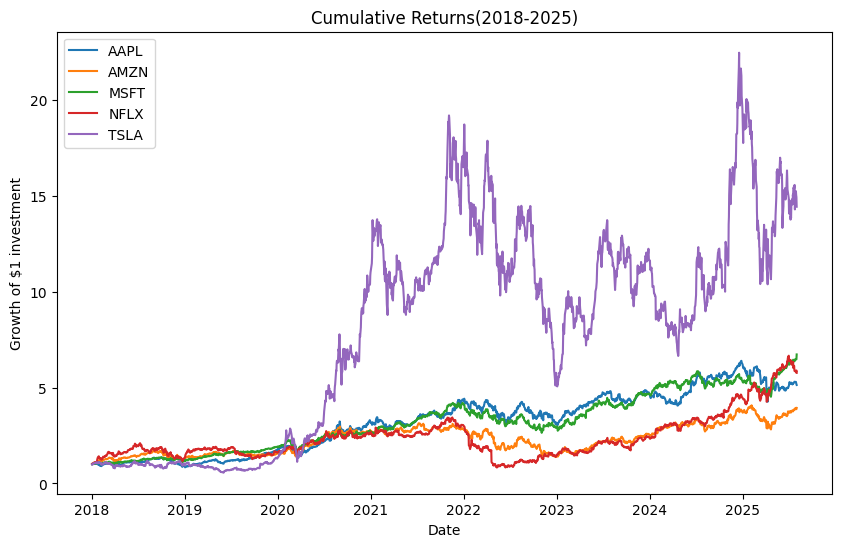

In [10]:
# Calculate the cumulative return of each stock
cumulative_returns = (1 + returns).cumprod() 

#Plot cumulative returns
plt.figure(figsize = (10, 6))
for ticker in cumulative_returns.columns:
    plt.plot(cumulative_returns.index, cumulative_returns[ticker], label = ticker)

plt.title('Cumulative Returns(2018-2025)')
plt.xlabel('Date')
plt.ylabel('Growth of $1 investment')
plt.legend()
plt.show()

<p><strong>
    Interpretation of Cumulative Returns:
</strong></p>

 - Tesla(TSLA): Stands out dramatically. A 1 USD in 2018 would have grown to around 20 USD at its peak, although the path was extremely volatile with sharp ups and downs. This highlights Tesla as a high-risk, high-reward stock.
 - Microsoft(MSFT): Shows the most consistent long-term growth. The line rises steadily, reaching around $6-7 USD by 2025, indicating strong performance with relatively lower volatility compared to "TSLA".
 - Apple(AAPL): it also shows a solid growth, roughly doubling/tripling the investment, but slightly below Microsoft in total performance.
 - Netflix(NFLX): shows a moderate growth with more fluctuations than AAPL/MSFT, Netflix ending around \$5-6.
 - Amazon(AMZN): underperformed the relative to peers, ending closer to \$3-4 by 2025.

<p><strong>Overall:</strong></p> 
 
 - Tesla delivered the highest returns but with extreme volatility.

 - Microsoft appears the most attractive in terms of steady, risk-adjusted growth.

 - Apple and Netflix sit in the middle, while Amazon lagged behind within this group.

<h1>
    <strong>8. Monte Carlo Simulation</strong>
</h1>

 - The Goal here is to analyze combinations of stocks instead of looking at each stock individually.

<p><strong>Why:</strong></p>

 - Investors rarely put all their money in a single stock.

 - They usually build a portfolio, which is a weighted mix of multiple assets.

 - The key question: Which combination of these 5 stocks provides the best balance between risk and return?

<p><strong>Why it matters:</strong></p>

 - We can visualize all possible portfolios in risk-return space.

 - This produces the Efficient Frontier, a curve showing the best trade-offs between risk and return.

<p><strong>Two special portfolios often highlighted:</strong></p>

 - Minimum Variance Portfolio (MVP): Portfolio with the lowest possible risk.

 - Maximum Sharpe Portfolio (Tangency Portfolio): Portfolio with the highest risk-adjusted return.

<p><strong>What we’ll do:</strong></p>

 1. Generate thousands of random portfolios (e.g., 10,000).
     - Each portfolio = a set of weights for the 5 stocks.
     - Weights are non-negative and must sum to 1 (100% invested).
 2. For each portfolio, calculate:
     - Expected Return (annual) = weighted sum of annual returns.
     - Risk / Volatility (annual) = computed using the covariance matrix.
     - Sharpe Ratio = (Return - Risk-free rate) ÷ Volatility (assume 2% annual risk-free).
 3. Visualize all portfolios on a scatter plot (x = Risk, y = Return, color = Sharpe).
     - The upper boundary of this cloud of points is the Efficient Frontier.
     - Later, we will highlight:
        - Minimum Variance Portfolio (MVP) = lowest risk,
        - Maximum Sharpe Portfolio (Tangency) = best risk-adjusted return.

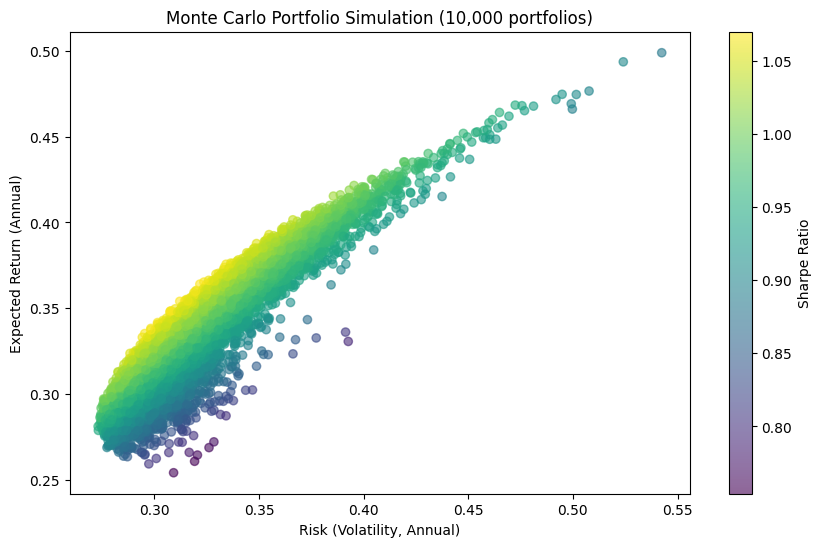

In [11]:
numerical_portfolios = 10000 # this is a random portfolios you can input any amount
rf = 0.02                    # this is annual risk-free rate

# Inputs prepared in previous steps: 
# - summary['Mean_Annual'] = Annual expected returns per stock 
# - covariance_annual = annualized covariance matrix

mean_returns = summary['Mean_Annual'].values
tickers = summary.index.tolist()
covariance_matrix = covariance_annual.values

results = {'Return': [], 'Risk': [], 'Sharpe': [], 'Weights': []}

for _ in range(numerical_portfolios):
    # Random long-only weights summing to 1
    weight = np.random.random(len(mean_returns))
    weight = weight / weight.sum()

    # Portfolio metrics
    portfolio_return = np.dot(weight, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weight.T, np.dot(covariance_matrix, weight)))
    portfolio_sharpe = (portfolio_return - rf) / portfolio_volatility

    # Collect
    results['Return'].append(portfolio_return)
    results['Risk'].append(portfolio_volatility)
    results['Sharpe'].append(portfolio_sharpe)
    results['Weights'].append(weight)

# Create DataFrame AFTER loop
portfolios = pd.DataFrame({
    'Return': results['Return'],
    'Risk': results['Risk'],
    'Sharpe': results['Sharpe'],
})

# Add weight columns
for i, t in enumerate(tickers):
    portfolios[f"weight_{t}"] = [w[i] for w in results['Weights']]

# Scatter plot
plt.figure(figsize=(10,6))
scatter_plot = plt.scatter(
    portfolios['Risk'], portfolios['Return'],
    c=portfolios['Sharpe'], cmap='viridis', alpha=0.6
)
plt.colorbar(scatter_plot, label='Sharpe Ratio')
plt.xlabel('Risk (Volatility, Annual)')
plt.ylabel('Expected Return (Annual)')
plt.title('Monte Carlo Portfolio Simulation (10,000 portfolios)')
plt.show()


<p><strong>Interpretation of Monte Carlo Simulation</strong></p>

 - Each point on the scatter plot represents a randomly generated portfolio.
 - X-axis: Risk (annualized volatility)
 - Y-axis: Expected annual return
 - Color: Sharpe Ratio (yellow = higher risk-adjusted return)
  
<p><strong>Key Insights:</strong></p>

 - The points form an upward-sloping “cloud” this illustrates the Efficient Frontier.
 - Portfolios along the upper edge provide the highest return for a given level of risk.
 - Portfolios below this frontier are inefficient, offering lower returns for the same risk.

<p><strong>Risk–Return Relationship:</strong></p>

 - Higher risk usually leads to higher expected returns.
 - Beyond a certain point, increasing risk yields smaller improvements in return, showing diminishing efficiency.

<p><strong>Sharpe Ratio (color coding):</strong></p>

 - Brighter yellow: higher Sharpe: optimal balance between risk and return
 - Darker green/purple: lower Sharpe: either too much risk or insufficient return

<p><strong>Takeaway:</strong></p>

 - Monte Carlo simulation illustrates the trade-off between risk and return across thousands of portfolios.
 - The Efficient Frontier highlights the most optimal portfolios.
 - Next, we will identify two key portfolios:
 - Minimum Variance Portfolio (MVP): lowest risk
 - Maximum Sharpe Portfolio (Tangency Portfolio): best risk-adjusted return

<h1><strong>9. Optimal Portfolios(MVP & Maximum Shape)</strong></h1>

<p>The goal here are to move from random portfolio exploration to finding the optimal portfolios on the Efficient Frontier.</p>

 - The Monte Carlo simulation showed the overall risk–return landscape, but it was random.
 - To make real investment decisions, we want specific portfolios with clear rules.
 - Two key portfolios stand out in Modern Portfolio Theory:

1. Minimum Variance Portfolio (MVP):
    - The portfolio with the lowest possible risk (volatility).
    - Ideal for conservative investors.
2. Maximum Sharpe Portfolio (Tangency Portfolio):
    - The portfolio with the highest Sharpe Ratio.
    - Maximizes return per unit of risk.
    - Considered the “most efficient” portfolio when a risk-free asset exists.

=== Optimal Portfolios ===
MVP -> Return: 0.2819 | Vol: 0.2728 | Sharpe: 0.9599
Tangency -> Return: 0.3562 | Vol: 0.3121 | Sharpe: 1.0771

         W_MVP  W_Tangency
Ticker                    
AAPL    0.3111      0.0272
AMZN    0.1062      0.0000
MSFT    0.5128      0.6138
NFLX    0.0699      0.1418
TSLA    0.0000      0.2173


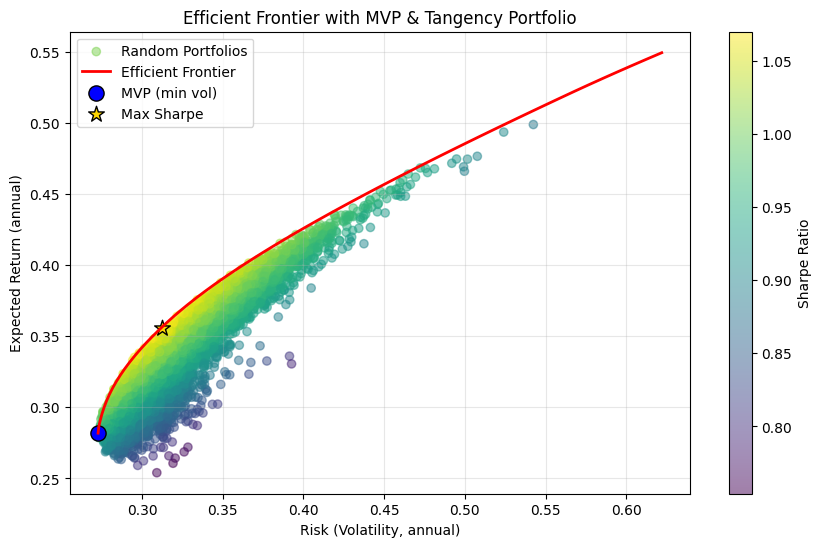

In [12]:
# Inputs from previous steps
mu = summary["Mean_Annual"].values        # expected annual returns, shape (n,)
Sigma = covariance_annual.values          # annualized covariance matrix, shape (n,n)
n = len(mu)

# Helper functions
def portfolio_return(w):
    return np.dot(w, mu)

def portfolio_volatility(w):
    return np.sqrt(np.dot(w.T, np.dot(Sigma, w)))

def neg_sharpe(w, rf_rate=rf):
    # maximize Sharpe -> minimize negative Sharpe
    vol = portfolio_volatility(w)
    ret = portfolio_return(w)
    if vol == 0:
        return np.inf
    return -(ret - rf_rate) / vol

# Constraints & bounds (long-only, fully invested)
bounds = tuple((0.0, 1.0) for _ in range(n))
cons_sum_to_1 = {"type": "eq", "fun": lambda w: np.sum(w) - 1.0}
w0 = np.ones(n) / n  # equal weights as a starting point

# 1) Minimum Variance Portfolio (MVP): minimize volatility subject to sum(weights)=1
res_mvp = minimize(
    portfolio_volatility, w0,
    method="SLSQP", bounds=bounds, constraints=[cons_sum_to_1],
    options={"disp": False}
)

w_mvp = res_mvp.x
ret_mvp = portfolio_return(w_mvp)
vol_mvp = portfolio_volatility(w_mvp)
sharpe_mvp = (ret_mvp - rf) / vol_mvp

# 2) Maximum Sharpe (Tangency): maximize Sharpe subject to sum(weights)=1
res_tan = minimize(
    neg_sharpe, w0,
    args=(rf,), method="SLSQP", bounds=bounds, constraints=[cons_sum_to_1],
    options={"disp": False}
)

w_tan = res_tan.x
ret_tan = portfolio_return(w_tan)
vol_tan = portfolio_volatility(w_tan)
sharpe_tan = (ret_tan - rf) / vol_tan

# Optional: build Efficient Frontier by target return
target_rets = np.linspace(ret_mvp, max(mu)*0.98, 60)  # from MVP return up to near max single-stock return
frontier_vols = []

for tr in target_rets:
    cons = [
        cons_sum_to_1,
        {"type": "eq", "fun": lambda w, tr=tr: portfolio_return(w) - tr},
    ]
    res = minimize(portfolio_volatility, w0, method="SLSQP", bounds=bounds, constraints=cons)
    frontier_vols.append(res.fun)

# Show weights in a tidy table
opt_table = pd.DataFrame({
    "Ticker": tickers,
    "W_MVP": w_mvp,
    "W_Tangency": w_tan
}).set_index("Ticker").round(4)

print("=== Optimal Portfolios ===")
print(f"MVP -> Return: {ret_mvp:.4f} | Vol: {vol_mvp:.4f} | Sharpe: {sharpe_mvp:.4f}")
print(f"Tangency -> Return: {ret_tan:.4f} | Vol: {vol_tan:.4f} | Sharpe: {sharpe_tan:.4f}\n")
print(opt_table)

# Plot: Monte Carlo cloud (if 'portfolios' from Step 8 exists), frontier, and optimal points
plt.figure(figsize=(10,6))
if 'portfolios' in globals():
    sc = plt.scatter(portfolios["Risk"], portfolios["Return"],
                     c=portfolios["Sharpe"], cmap="viridis", alpha=0.5, label="Random Portfolios")
    plt.colorbar(sc, label='Sharpe Ratio')

# Efficient Frontier
plt.plot(frontier_vols, target_rets, "r-", lw=2, label="Efficient Frontier")

# MVP & Tangency markers
plt.scatter(vol_mvp, ret_mvp, c="blue", s=120, marker="o", edgecolors="k", label="MVP (min vol)")
plt.scatter(vol_tan, ret_tan, c="gold", s=140, marker="*", edgecolors="k", label="Max Sharpe")

plt.xlabel("Risk (Volatility, annual)")
plt.ylabel("Expected Return (annual)")
plt.title("Efficient Frontier with MVP & Tangency Portfolio")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

<p><strong>Portfolio Optimization Results & Analysis</strong></p>

Our mathematical optimization successfully identified two critical portfolios that represent different investment philosophies along the Efficient Frontier:

<strong>1. Minimum Variance Portfolio (MVP) - The Conservative Choice</strong>

**Performance Metrics:**
- Annual Expected Return: has 28% annually
- Annual Volatility: has 27% annually 
- Sharpe Ratio: has 0.96 sharpe

**Asset Allocation Strategy:**
- Microsoft (MSFT): 51% - Dominant stable anchor
- Apple (AAPL): 31% - Secondary stability component  
- Amazon (AMZN): 10% - Minor diversification
- Netflix (NFLX): 7% - Small growth exposure
- Tesla (TSLA): 0% - Completely excluded due to volatility

**Investment Philosophy:** This portfolio represents the ultimate risk minimization strategy. By concentrating heavily in Microsoft and Apple two tech giants with established market positions and lower volatility profiles it completely avoids Tesla's unpredictable swings. Perfect for conservative investors who prioritize capital preservation and steady, predictable returns over aggressive growth.

<strong>Maximum Sharpe Portfolio (Tangency) - The Efficiency Master</strong>

**Performance Metrics:**
- Annual Expected Return: 36% 
- Annual Volatility: 31% 
- Sharpe Ratio: 1.08 (optimal risk-adjusted performance)

**Asset Allocation Strategy:**
- Microsoft (MSFT): 61% - Core foundation (even higher than MVP)
- Tesla (TSLA): 22% - Strategic high-growth component
- Netflix (NFLX): 14% - Growth diversification
- Apple (AAPL): ~0% - Surprisingly minimal allocation
- Amazon (AMZN): ~0% - Also excluded from optimal mix

**Investment Philosophy:** This represents the sweet spot of efficiency - maximizing return per unit of risk taken. While maintaining Microsoft as the bedrock (61%), it strategically incorporates Tesla's explosive growth potential. The algorithm determined that this specific blend delivers the highest possible Sharpe ratio, making it ideal for growth-focused investors who want maximum bang for their risk buck.

<p><strong>Visual Analysis Breakdown</strong></p>

**The Scatter Plot Elements:**
- Colorful dots = 10,000 randomly generated portfolios showing all possible combinations
- Red efficiency curve = The mathematical frontier of optimal portfolios  
- Blue dot = MVP (minimum risk point)
- Golden star = Tangency portfolio (maximum efficiency point)

**Strategic Investment Insights**

**The optimization reveals a fascinating risk-return spectrum**:

For Risk-Averse Investors: The MVP offers a compelling 28% return with minimal 27% volatility by betting big on Microsoft-Apple stability and completely avoiding Tesla's chaos.

For Growth-Seeking Investors: The Tangency portfolio pushes returns to 36% with only slightly higher 31% risk by strategically blending Microsoft's reliability with Tesla's explosive potential.

Key Takeaway: Both portfolios heavily favor Microsoft, suggesting it's the optimal anchor stock in this universe. The main decision point becomes whether to play it completely safe (MVP) or add Tesla's rocket fuel for enhanced returns (Tangency).
